<a href="https://colab.research.google.com/github/insh-samnani/Personal-Projects/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Upload CSV File from your PC/Laptop

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving titles.csv to titles.csv
User uploaded file "titles.csv" with length 2024649 bytes


In [ ]:
#Importing Libraries

import io 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
from sklearn.pipeline import make_pipeline

In [ ]:
#Creating DataFrame

netflix = pd.read_csv(io.BytesIO(uploaded['titles.csv']))

In [ ]:
#Viewing few records of DataFrame NETFLIX

netflix.head(20)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5
7,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,"['drama', 'music', 'romance', 'family']",['US'],NaN,tt0058385,7.8,94121.0,15.949,7.6
8,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'drama']",['US'],NaN,tt0080453,5.8,69053.0,44.038,6.2
9,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['drama', 'crime', 'action']",['US'],NaN,tt0061418,7.7,111189.0,15.309,7.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'COUNT')

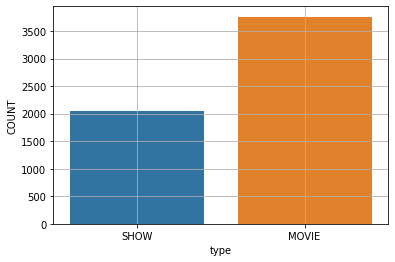

In [ ]:
#The following analysis shows the number of "SHOWs" and "MOVIEs" that are included in our SERIES of "netflix"

sns.countplot("type",data=netflix) 
plt.grid(True)
plt.ylabel("COUNT")
#sns.countplot(netflix["type"]) OR sns.countplot(netflix.type) #More ways to plot same graph

In [ ]:
#Filtering the data as if release_year is lying between "2012 and 2022" AND type is equal to "SHOW", You can modify the code for any range of the years and "MOVIE" type
netflix_filtered=netflix[netflix['release_year'].between(2012,2022)]
netflix_filtered=netflix_filtered[netflix_filtered["type"]=="SHOW"]

#The following analysis displays the number of "SHOWS" that released in a particular year from "2012 to 2022"
netflix_filtered.groupby('release_year')['title'].size() #You can also use .count() instead of .size()

release_year
2012     31
2013     37
2014     46
2015     93
2016    142
2017    183
2018    301
2019    308
2020    306
2021    303
2022    109
Name: title, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


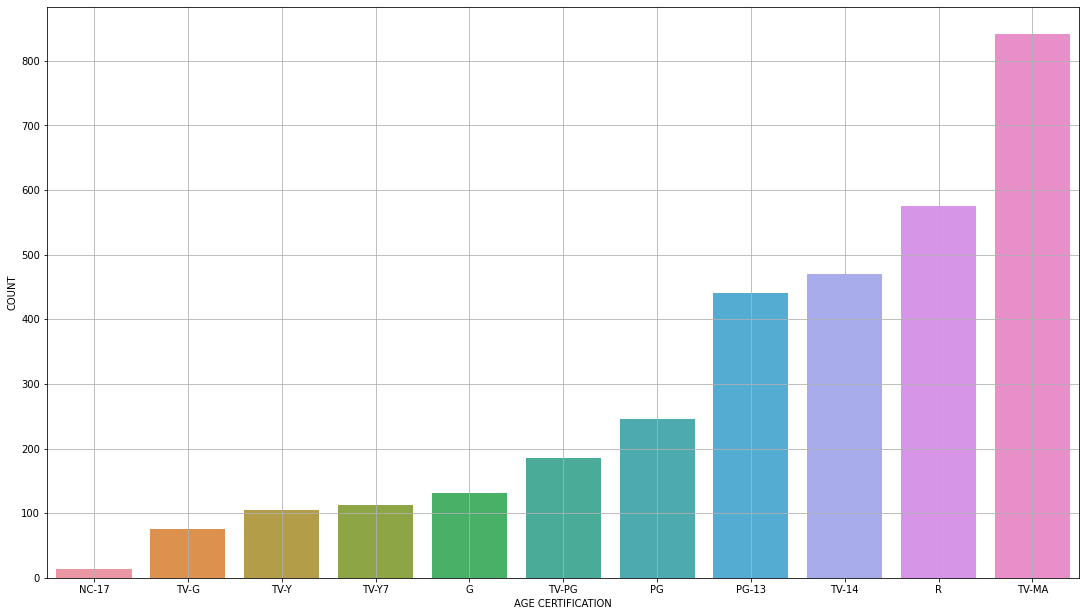

In [ ]:
#The following analysis looks for all the possible age_certifications in our DataFrame and plotting that for each "age_certification", how many titles are lying under that "age_certification"
#Giving me the total count of movies within a specific age certification like, how many movies wer of PG(parents guardian), R(restricted to below 18), etc. It has been sorted in ascending order. The first bar is showing the "age_certification" whose count is minimum, and so on.
#TV-MA (TV Maturity Adults, only 18+ allowed)
#R (Restricted but with accompanying of Parents allowed)
#PG(Parents authoritication required for people below 18)
#TV-14 (Above 14 Content)
#G (Appropriate for people of all ages)
#PG-13 (Below 13 people have to consent their parents)
#TV-PG (TV shows that requires parent's consent of people below 18)
#TV-Y(Programs most appropriate for young audience)
#TV-Y7(Programs most appropraite for children aged 7-9)
#NC17 (No children aged below 17 allowed)

fig = matplotlib.pyplot.gcf()
sns.countplot(netflix["age_certification"],order=['NC-17','TV-G','TV-Y','TV-Y7','G','TV-PG','PG','PG-13','TV-14','R','TV-MA'])
plt.grid(True)
plt.ylabel("COUNT")
plt.xlabel("AGE CERTIFICATION")
fig.set_size_inches(18.5, 10.5, forward=True)

<Figure size 432x288 with 0 Axes>

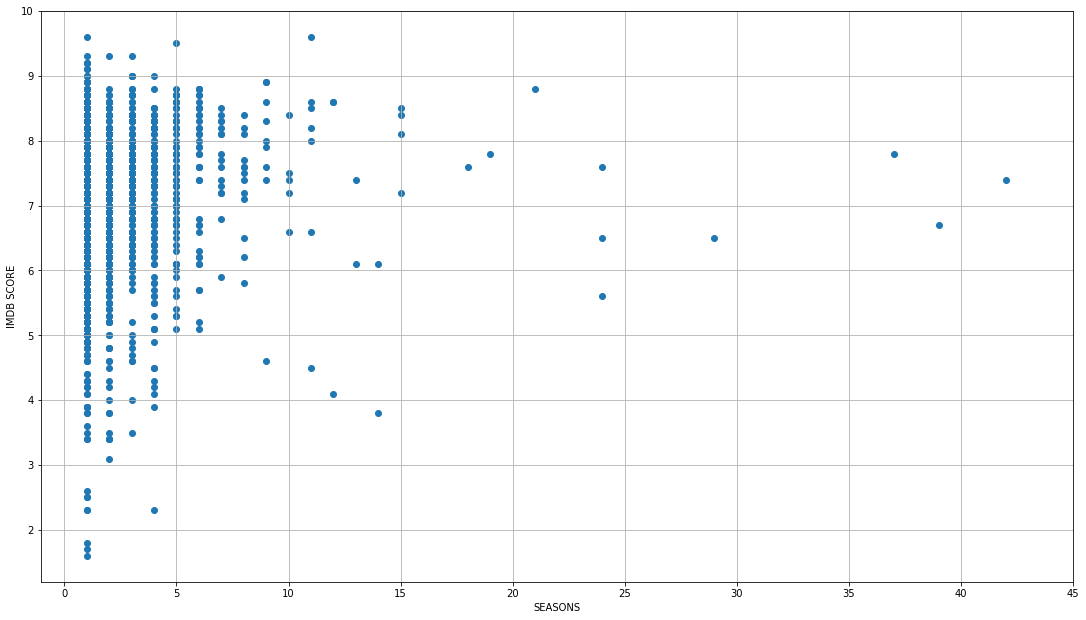

In [ ]:
#Our fourth analysis displays the relation between the "seasons" and "imdb_score". We can analyze that for the shows having less number of seasons, it can go between low-high "imdb_score". This means that the content of show will make people to decide that whether they have to rate low, moderate, or high. But if the "seasons" are more, it keeps on engaging people to experience thrilling climaxes and thus rate between moderate-high. Now if the "seasons" are extra-ordinary, it bores people, and they never go for high rating and revolves around moderate ratings.
#We can see that the shape tends to be rightly-skewed, where the data distribution is not symmetrical and the peak of the graph lies at the left-most.

fig = matplotlib.pyplot.gcf()
fig, ax = plt.subplots()
ax.scatter(netflix['seasons'],netflix['imdb_score'])
fig.set_size_inches(18.5, 10.5, forward=True)
xtick_loc = [0,5,10,15,20,25,30,35,40,45]
plt.grid(True)
plt.ylabel("IMDB SCORE")
plt.xlabel("SEASONS")
ax.set_xticks(xtick_loc)
plt.show()

<Figure size 432x288 with 0 Axes>

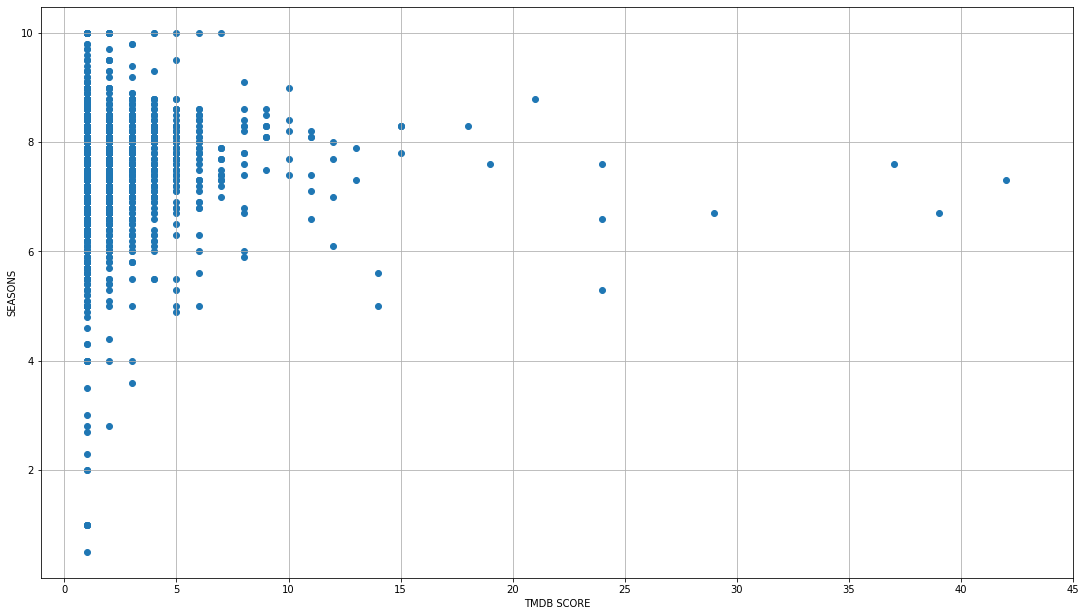

In [ ]:
#Consider "tmdb_score" on y axis. We can see that both the graphs (for "imdb_score" and "tmdb_score"), we have same shape and view (except for the very few variances (negligible)). This means that on various movie databases, people tends to rate similarly.

fig = matplotlib.pyplot.gcf()
fig, ax = plt.subplots()
ax.scatter(netflix['seasons'],netflix['tmdb_score'])
fig.set_size_inches(18.5, 10.5, forward=True)
xtick_loc = [0,5,10,15,20,25,30,35,40,45]
plt.ylabel("SEASONS")
plt.xlabel("TMDB SCORE")
plt.grid(True)
ax.set_xticks(xtick_loc)
plt.show()

<Figure size 432x288 with 0 Axes>

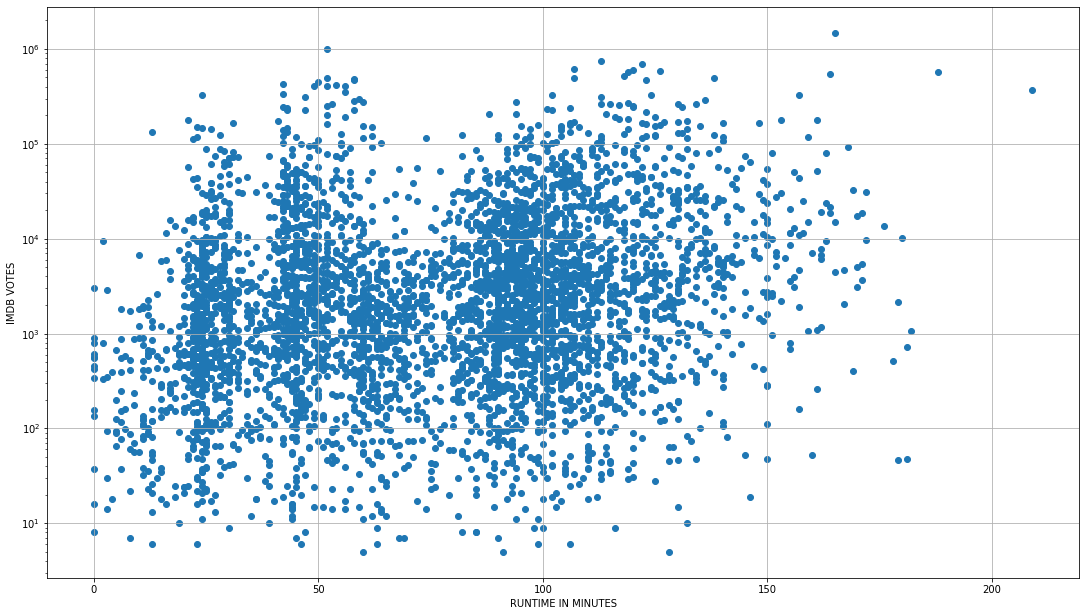

In [ ]:
#netflix_filtered1=netflix[netflix['release_year'].between(2002,2012)] #You can also filter the original DataFrame through this code. Although we have less number of records between 2002-2012, but we can still see that more movies are having the run-time in minutes between 80-130 and so we are having moderate number of voters for each of them.
#As we can see that for short movies/shows (having runtime in minutes from 20-70), and movies/shows (having runtime in minutes from 80-130), we are having more data, thus we are having moderate number of voters for each of them.

netflix_filtered1=netflix[netflix['release_year'].between(2012,2022)]
fig = matplotlib.pyplot.gcf()
fig, ax = plt.subplots()
ax.scatter(x="runtime",y="imdb_votes",data=netflix_filtered1)
plt.xlabel("RUNTIME IN MINUTES")
plt.ylabel("IMDB VOTES")
fig.set_size_inches(18.5, 10.5, forward=True)
plt.yscale('log')
plt.grid(True)
plt.show()

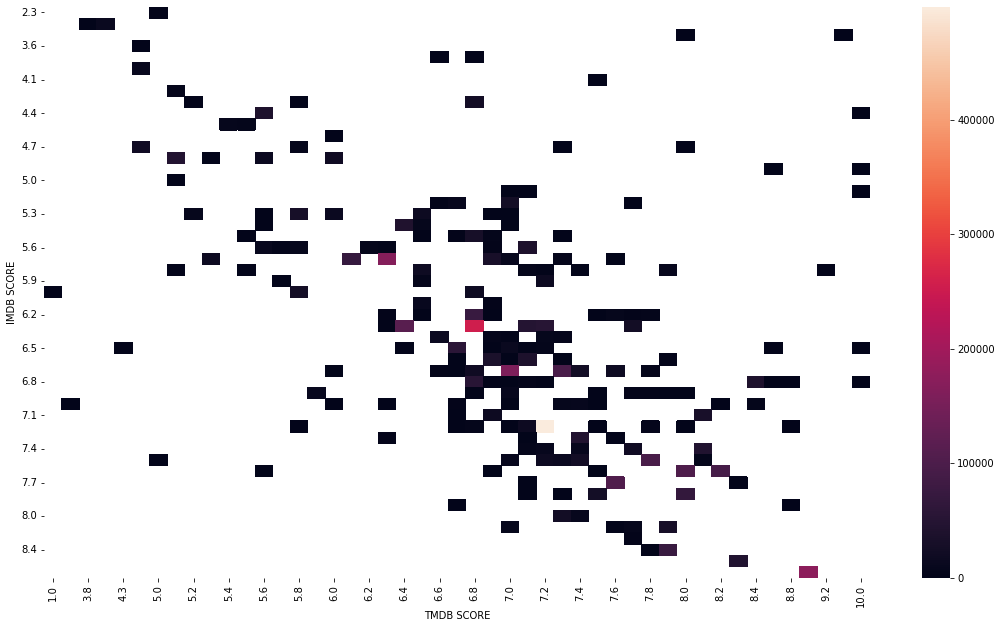

In [ ]:
#This analysis is filtered for the movies released in the last two years that are produced in US. So our fifth analysis shows that for each combination of "imdb_score" and "tmdb_score", what is the sum of "imdb_votes". We can see that mostly we have sum of "imdb_votes" lying between low-moderate for the like combinations such as 7.0-7.0, 6.5-6.6, etc. This means that both the movie databases have similar ratings for each title. Apart from that, if the value is less, we have less number of combinations, but sum of the voters lying around that combinations are low.

fig = matplotlib.pyplot.gcf()
netflix_filtered2=netflix[netflix['release_year'].between(2021,2022)]
netflix_filtered2=netflix_filtered2[netflix_filtered2["production_countries"]=="['US']"]
sns.heatmap(pd.crosstab(netflix_filtered2["imdb_score"], netflix_filtered2["tmdb_score"], values=netflix_filtered2["imdb_votes"],aggfunc='sum'))
plt.ylabel("IMDB SCORE")
plt.xlabel("TMDB SCORE")
fig.set_size_inches(18.5, 10.5, forward=True)

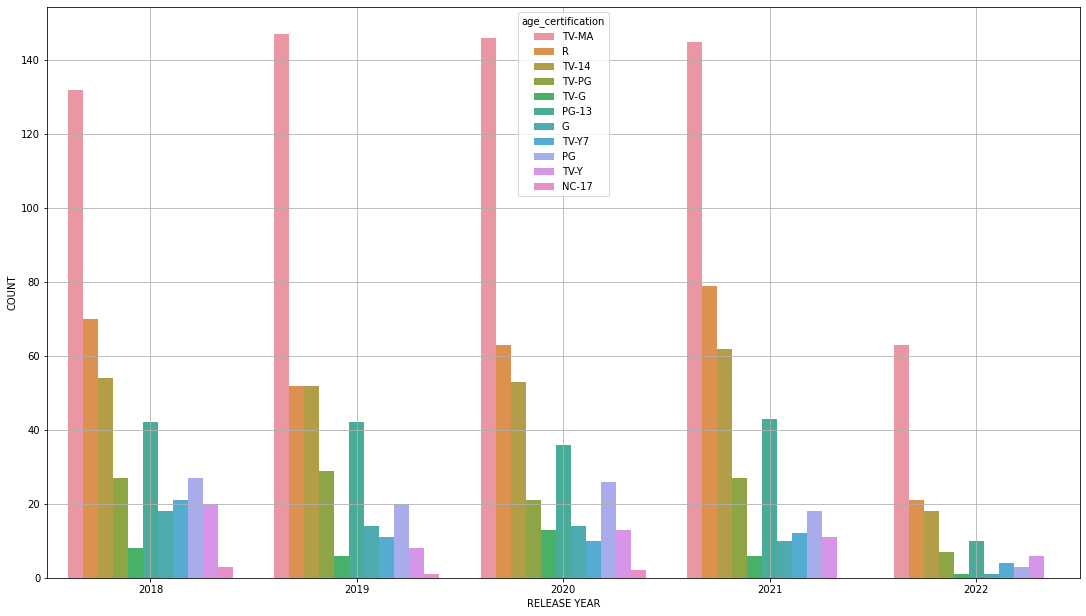

In [ ]:
#This plot is counting movies with release within the year range(2018-22), with a hue parameter 'age certification', which will allow us to look closely that in a specific year how many movies with different certifications has been released
#An inference can be drawn by looking at this graph that in all years TV-MA(Tv maturity adult)movies has been released more than any other age certified movie

fig = matplotlib.pyplot.gcf()
netflix_filtered3=netflix[netflix['release_year'].between(2018,2022)]
sns.countplot(x="release_year",hue="age_certification",data=netflix_filtered3)
plt.grid(True)
plt.ylabel("COUNT")
plt.xlabel("RELEASE YEAR")
fig.set_size_inches(18.5, 10.5, forward=True)

                 release_year   runtime   seasons  imdb_score  imdb_votes  \
release_year         1.000000 -0.211076 -0.505831   -0.102849   -0.196988   
runtime             -0.211076  1.000000 -0.132740   -0.159297    0.138610   
seasons             -0.505831 -0.132740  1.000000    0.097727    0.212645   
imdb_score          -0.102849 -0.159297  0.097727    1.000000    0.189954   
imdb_votes          -0.196988  0.138610  0.212645    0.189954    1.000000   
tmdb_popularity      0.025628 -0.027493  0.331362    0.023159    0.201813   
tmdb_score           0.049107 -0.285232  0.026796    0.587675    0.109720   

                 tmdb_popularity  tmdb_score  
release_year            0.025628    0.049107  
runtime                -0.027493   -0.285232  
seasons                 0.331362    0.026796  
imdb_score              0.023159    0.587675  
imdb_votes              0.201813    0.109720  
tmdb_popularity         1.000000    0.068405  
tmdb_score              0.068405    1.000000  


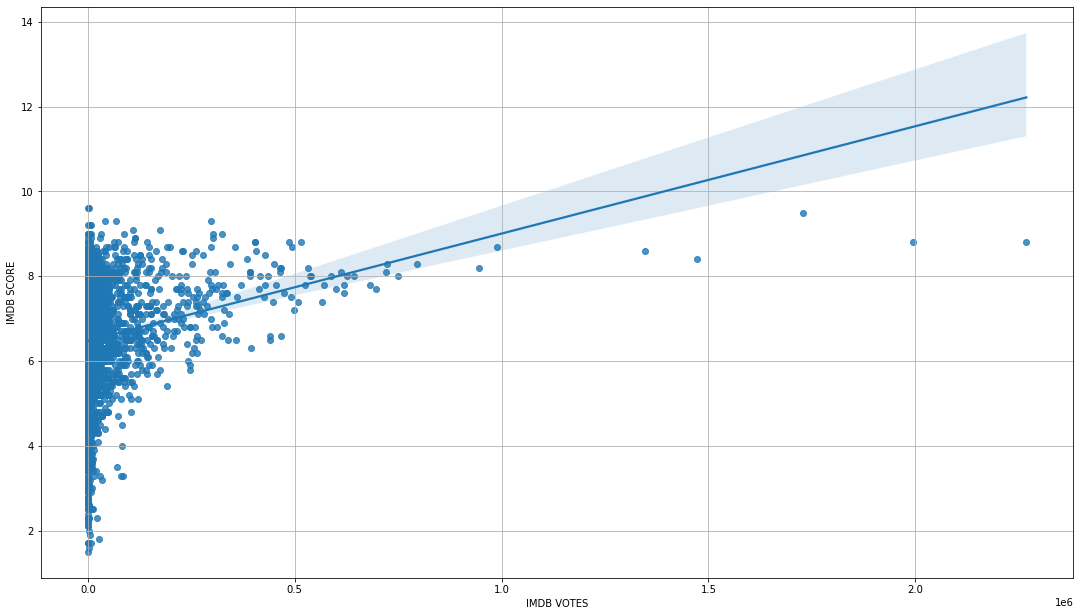

In [ ]:
#This analysis first calculates the correlation between each pair of the variables present in our dataset. As people can make false analysis like if number of votes increases, this means that score for that movie also increases. To make clearity, we constructed a regression plot for "imdb_score" VS "imdb_votes". As we can see that points are jumbled vertically at the start of the line and are not properly alligned with the regression line, it means that both the variables are not highly correlated. This means that there is no direct relationship between both the variables, and both the variables are weekly correlated. Inshort, if number of votes increases, so the votes can either be in favor of that movie, or in against, it depends.

print(netflix.corr())
fig = matplotlib.pyplot.gcf()
sns.regplot(x="imdb_votes",y="imdb_score",data=netflix)
plt.ylabel("IMDB SCORE")
plt.xlabel("IMDB VOTES")
plt.grid(True)
fig.set_size_inches(18.5, 10.5, forward=True)

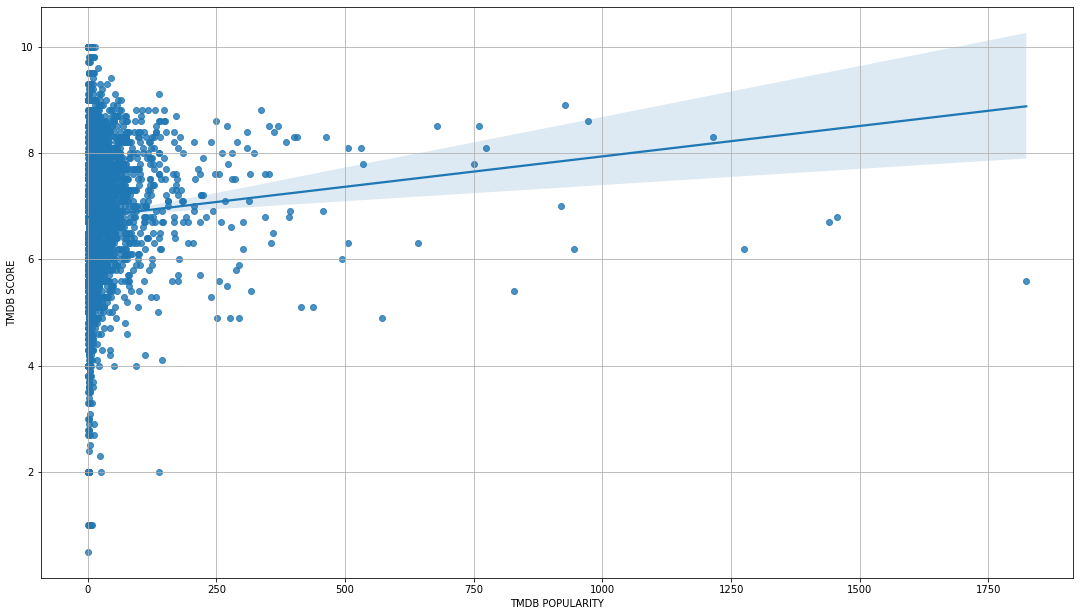

In [ ]:
#Let us cross-check our assumption with tmdb. And yes, we got it right.

fig = matplotlib.pyplot.gcf()
sns.regplot(x="tmdb_popularity",y="tmdb_score",data=netflix)
plt.grid(True)
plt.ylabel("TMDB SCORE")
plt.xlabel("TMDB POPULARITY")
fig.set_size_inches(18.5, 10.5, forward=True)

In [ ]:
#As we observede previously that graphically, the behavior of imdb and tmdb were quite similar and so they are moderately correlated by the value of 0.587675. Let us try ransforming variables ("imdb_score","tmdb_score") and check if there correlation increases.

netflix_reg=netflix
netflix_reg["imdb_score_squared"]=netflix_reg["imdb_score"] ** 2
netflix_reg["tmdb_score_squared"]=netflix_reg["tmdb_score"] ** 2
netflix_reg["imdb_score_squared"].corr(netflix_reg["tmdb_score_squared"]) #Showing almost same value as we find out above, hence no benefit of transforming the variables. (You can also try bu cubing and taking square roots.)

#You can find out coefficient of determination (The proportion of variance in the response variable that is predictable from the explanatory variable) by simply squaring the correlation as: netflix_reg["imdb_score_squared"].corr(netflix_reg["tmdb_score_squared"]) ** 2
#OR: print(mdl_netflix.rsquared), described in next section of code.
#Further you can also calculate the percentage of correlation by simply multiplying the coefficient of determination by 100. It will come around 8.13570576244852 that is very low percentage and thus showing that two variables are not strongly correlated

0.5841836898138121

In [ ]:
#Linear Regression equation on tmdb_score VS runtime (explanatory variable is numeric: runtime)

mdl_netflix=ols("tmdb_score ~ runtime",data=netflix).fit()
print(mdl_netflix.params) #It must be noted that slope comes negative and so the correlation between both the variables was negative. Negative sign in slope also tells that there is no direct relationship between both variables.

Intercept    7.482132
runtime     -0.008480
dtype: float64


In [ ]:
#Linear Regression equation on imdb_score VS type (explanatory variable is categorical: type)

mdl_netflix1=ols("imdb_score ~ type + 0",data=netflix).fit()
print(mdl_netflix1.params) #Here it will simply show mean of each category, that can also be seen by groupby function written in next line. You can uncomment and execute it.

#netflix.groupby("type")["imdb_score"].mean()

type[MOVIE]    6.266980
type[SHOW]     7.017377
dtype: float64


In [ ]:
#let us start making predictions. For example, what would be the tmdb_score if runtime (in minutes) is 121
explanatory_var=pd.DataFrame({"runtime":np.arange(80,130)})                                           #If you want to predict for all values, you can do so by: expl_data=netflix["runtime"]
                                                                                                                                                                #print(mdl_netflix.predict(expl_data))
                                                                                                                                                            #OR: print(mdl_netflix.fittedvalues)
prediction_data=explanatory_var.assign(tmdb_score_predicted=mdl_netflix.predict(explanatory_var))
print(prediction_data)

    runtime  tmdb_score_predicted
0        80              6.803723
1        81              6.795243
2        82              6.786763
3        83              6.778283
4        84              6.769803
5        85              6.761322
6        86              6.752842
7        87              6.744362
8        88              6.735882
9        89              6.727402
10       90              6.718922
11       91              6.710442
12       92              6.701962
13       93              6.693482
14       94              6.685001
15       95              6.676521
16       96              6.668041
17       97              6.659561
18       98              6.651081
19       99              6.642601
20      100              6.634121
21      101              6.625641
22      102              6.617161
23      103              6.608680
24      104              6.600200
25      105              6.591720
26      106              6.583240
27      107              6.574760
28      108   

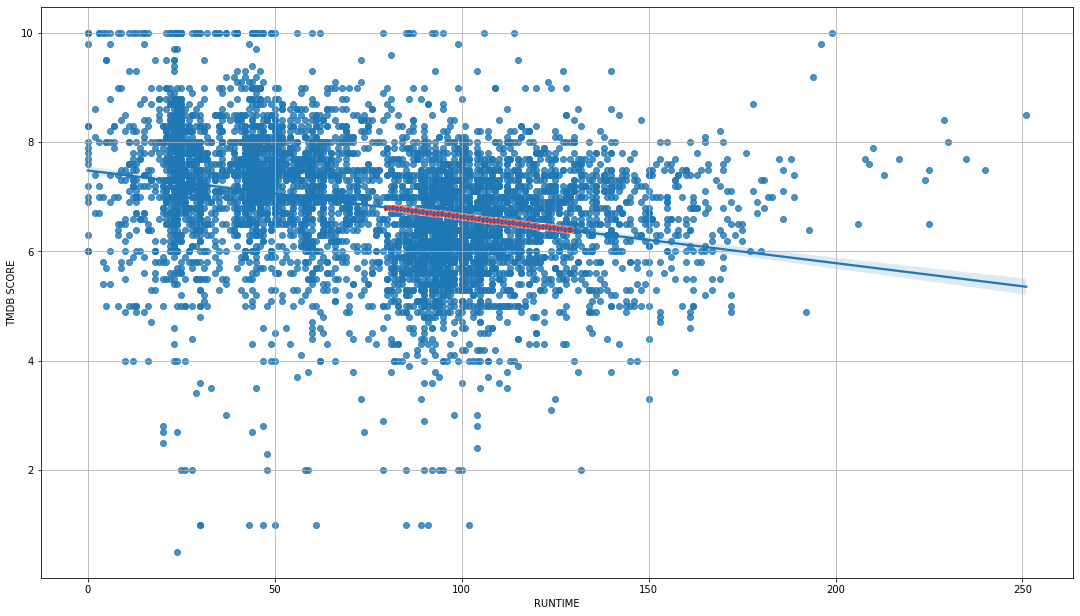

In [ ]:
#The analysis gives plotting for prediction data along with original data. We can see that the points for prediction data lies along with the linear regression line, and thus it is correctly predicting for response variable (tmdb_score) by using explanatory variable ("runtime")

fig = matplotlib.pyplot.gcf()
sns.regplot(x="runtime",y="tmdb_score",data=netflix)
sns.scatterplot(x="runtime",y="tmdb_score_predicted",data=prediction_data,color="red",marker="s")
fig.set_size_inches(18.5, 10.5, forward=True)
plt.ylabel("TMDB SCORE")
plt.xlabel("RUNTIME")
plt.grid(True)
plt.show()

In [ ]:
#Calculating MSE (Mean Square Error), RMSE (Root Mean Square Error) and RSE (Residual Standard Error) for our linear regression model

mse=mdl_netflix.mse_resid
print(mse) #You will see that MSE is very high. It must approach to 0 for a perfect linear regression model.
rse=np.sqrt(mse)
print(rse)
rmse_sq=mdl_netflix.resid ** 2
rmse_sum_sq= sum(rmse_sq)
deg_of_freedom=len(netflix.index)
rmse=np.sqrt(rmse_sum_sq/deg_of_freedom)
print(rmse)

1.2611152589936252
1.1229938819929632
1.0916081667619943


Text(0.5, 0, 'RUNTIME')

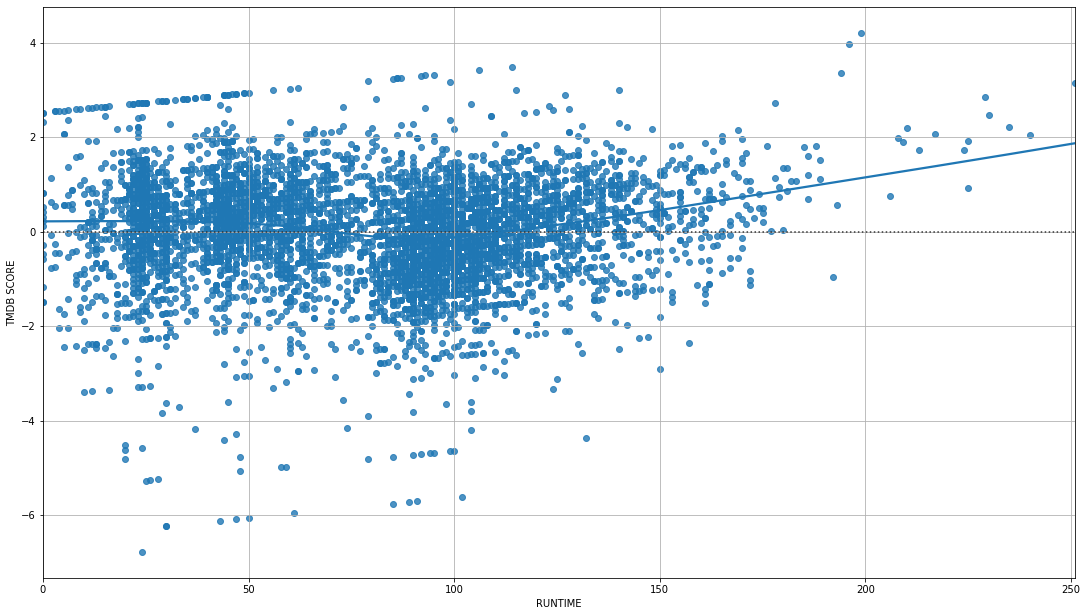

In [ ]:
#This along with next two plots will check for normal distribution of the data. We will prove that all three plots will show that the data is not normally distributed

fig = matplotlib.pyplot.gcf()
sns.residplot(x="runtime",y="tmdb_score",data=netflix,lowess=True)
plt.grid(True)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.ylabel("TMDB SCORE")
plt.xlabel("RUNTIME")

#point are not forming the curve of normal distribution along the line y=0

Text(0.5, 0, 'THEORETICAL QUANTILES')

<Figure size 1332x756 with 0 Axes>

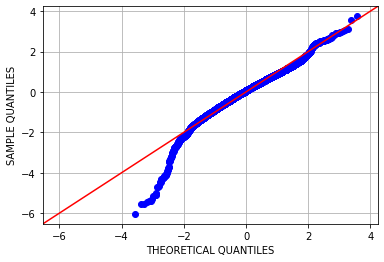

In [ ]:
fig = matplotlib.pyplot.gcf()
qqplot(data=mdl_netflix.resid,fit=True,line="45")
fig.set_size_inches(18.5, 10.5, forward=True)
plt.grid(True)
plt.ylabel("SAMPLE QUANTILES")
plt.xlabel("THEORETICAL QUANTILES")

#Points dont lie along the line hence another proof that the data points are not normally distributed

Text(0.5, 0, 'FITTED VALUES')

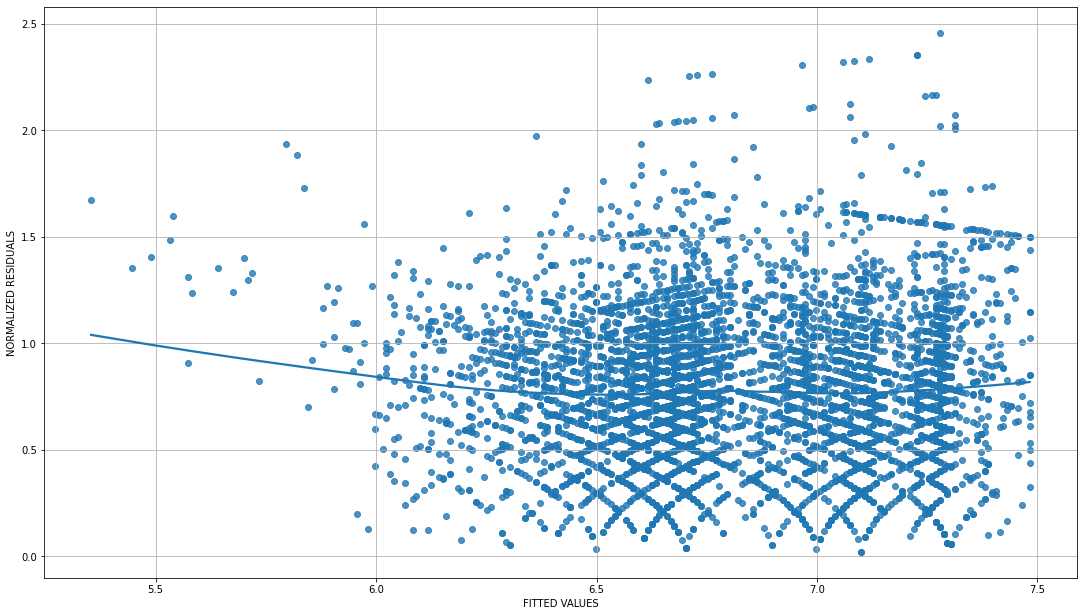

In [ ]:
fig = matplotlib.pyplot.gcf()
norm=mdl_netflix.get_influence().resid_studentized_internal
norm_sqrt=np.sqrt(np.abs(norm))
sns.regplot(x=mdl_netflix.fittedvalues,y=norm_sqrt,ci=None,lowess=True)
plt.grid(True)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.ylabel("NORMALIZED RESIDUALS")
plt.xlabel("FITTED VALUES")

#It is not forming the curve and data points are not randomly spreaded, thus another proof that our linear regression model is not good.

In [ ]:
#When points lies away from the line in the linear regressionj model, we look for various outliers, leverages, and influences. In such cases (as in our case), explanatory variables are extreme

netflix_temp=netflix
summary=mdl_netflix.get_influence().summary_frame()
netflix_temp["leverage"]=summary["hat_diag"]
netflix_temp["cooks_distance"]=summary["cooks_d"] #Important measure of influence
print(netflix_temp.head())

         id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm127384      Monty Python and the Holy Grail  MOVIE   
3   tm70993                        Life of Brian  MOVIE   
4  tm190788                         The Exorcist  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  King Arthur, accompanied by his squire, recrui...          1975   
3  Brian Cohen is an average young Jewish man, bu...          1979   
4  12-year-old Regan MacNeil begins to adapt an e...          1973   

  age_certification  runtime                 genres production_countries  \
0             TV-MA       48      ['documentation']               ['US']   
1                 R      113     ['crime', 'drama']               ['US']

In [ ]:
#Going through the summary of the linear regression model that we have prepared

mdl_netflix.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tmdb_score   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     485.9
Date:                Sat, 25 Jun 2022   Prob (F-statistic):          3.07e-103
Time:                        10:12:09   Log-Likelihood:                -8422.7
No. Observations:                5488   AIC:                         1.685e+04
Df Residuals:                    5486   BIC:                         1.686e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4821      0.034    221.843      0.000       7.416       7.548
runtime       -0.0085      0.000    -22.042      0.000      -0.009      -0.008
==============================================================================
Omnibus:                      733.800   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2272.412
Skew:                          -0.694   Prob(JB):                         0.00
Kurtosis:                       5.830   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Upload second CSV File from your PC/Laptop

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving credits.csv to credits.csv
User uploaded file "credits.csv" with length 3787069 bytes


In [ ]:
#Creating DataFrame for second CSV file

netflix2 = pd.read_csv(io.BytesIO(uploaded['credits.csv']))

In [ ]:
#The following code shows the total number of ACTORs and DIRECTORs along with the MOVIE_ID

act=0;
direct=0;
val=netflix2.iloc[0]
j=val["id"]
for ind in netflix2.index:
  if j==netflix2["id"][ind]:
    if netflix2["role"][ind]=="ACTOR":
      act=act+1
    elif netflix2["role"][ind]=="DIRECTOR":
      direct=direct+1
  else:
    print("The total number of ACTORS and DIRECTORS in movie with MOVIE_ID "+j+" are: "+str(act)+" and "+str(direct)+" respectively.")
    act=0
    direct=0
    j=netflix2["id"][ind]
    if j==netflix2["id"][ind]:
      if netflix2["role"][ind]=="ACTOR":
        act=act+1
      elif netflix2["role"][ind]=="DIRECTOR":
        direct=direct+1

role
ACTOR       72690
DIRECTOR     4523
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'ROLE')

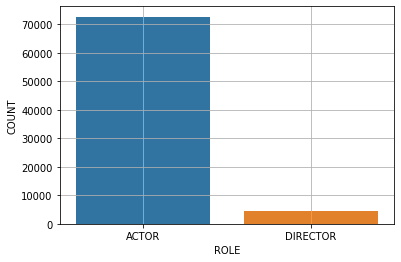

In [ ]:
#Our sixth analysis is the graphical and tabular representation for the total number of roles as the actors and directors

print(netflix2.groupby("role").size())
sns.countplot("role",data=netflix2)
plt.grid(True)
plt.ylabel("COUNT")
plt.xlabel("ROLE")